# Descarga del dataset

In [1]:
!wget -O frutas.zip https://github.com/sarrietav-dev/sklearn-frutas/raw/main/frutas.zip

--2023-05-18 16:42:30--  https://github.com/sarrietav-dev/sklearn-frutas/raw/main/frutas.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sarrietav-dev/sklearn-frutas/main/frutas.zip [following]
--2023-05-18 16:42:31--  https://raw.githubusercontent.com/sarrietav-dev/sklearn-frutas/main/frutas.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6661759 (6.4M) [application/zip]
Saving to: ‘frutas.zip’

frutas.zip          100%[===================>]   6.35M  11.1MB/s    in 0.6s    

2023-05-18 16:42:31 (11.1 MB/s) - ‘frutas.zip’ saved [6661759/6661759]



In [2]:
!unzip -o frutas.zip

Archive:  frutas.zip
  inflating: frutas/Uchuva12.jpg     
  inflating: frutas/Fresa11.jpg      
  inflating: frutas/Fresa17.jpg      
  inflating: frutas/Fresa13.jpg      
  inflating: frutas/pruebauchuva2.png  
  inflating: frutas/Uchuva3.jpg      
  inflating: frutas/Fresa23.jpg      
  inflating: frutas/pruebacereza2.png  
  inflating: frutas/Fresa10.jpg      
  inflating: frutas/pruebauchuva.png  
  inflating: frutas/Fresa15.jpg      
  inflating: frutas/Uchuva1.jpg      
  inflating: frutas/Fresa20.jpg      
  inflating: frutas/pruebacereza.png  
  inflating: frutas/Fresa14.jpg      
  inflating: frutas/Fresa22.jpg      
  inflating: frutas/Uchuva18.jpg     
  inflating: frutas/Uchuva5.jpg      
  inflating: frutas/Uchuva11.jpg     
  inflating: frutas/Fresa8.jpg       
  inflating: frutas/Uchuva16.jpg     
  inflating: frutas/Uchuva25.jpg     
  inflating: frutas/Uchuva23.jpg     
  inflating: frutas/Fresa2.jpg       
  inflating: frutas/Fresa4.jpg       
  inflating: frutas/Uch

# Clasificador de frutas usando KNN

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Obtener los nombres de los archivos

In [4]:
fresa = [*range(1,26,1)]
uchuva = [*range(1,26,1)]

fresa=["frutas/Fresa"+str(s)+".jpg" for s in fresa]
uchuva=["frutas/Uchuva"+str(s)+".jpg" for s in uchuva]
uchuva

['frutas/Uchuva1.jpg',
 'frutas/Uchuva2.jpg',
 'frutas/Uchuva3.jpg',
 'frutas/Uchuva4.jpg',
 'frutas/Uchuva5.jpg',
 'frutas/Uchuva6.jpg',
 'frutas/Uchuva7.jpg',
 'frutas/Uchuva8.jpg',
 'frutas/Uchuva9.jpg',
 'frutas/Uchuva10.jpg',
 'frutas/Uchuva11.jpg',
 'frutas/Uchuva12.jpg',
 'frutas/Uchuva13.jpg',
 'frutas/Uchuva14.jpg',
 'frutas/Uchuva15.jpg',
 'frutas/Uchuva16.jpg',
 'frutas/Uchuva17.jpg',
 'frutas/Uchuva18.jpg',
 'frutas/Uchuva19.jpg',
 'frutas/Uchuva20.jpg',
 'frutas/Uchuva21.jpg',
 'frutas/Uchuva22.jpg',
 'frutas/Uchuva23.jpg',
 'frutas/Uchuva24.jpg',
 'frutas/Uchuva25.jpg']

## Leer las imagenes

In [5]:
images = fresa + uchuva

labels = [0]*25+[1]*25

x = []
y = []

for i in range(len(images)):
  img = cv2.imread(images[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_rs=cv2.resize(img, (200,200))
  x.append(img_rs)
  y.append(labels[i])

Text(0.5, 1.0, 'frutas/Uchuva1.jpg')

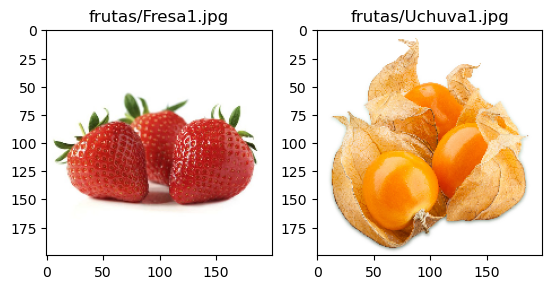

In [6]:
plt.subplot(1,2,1)
plt.imshow(x[0], cmap = 'Accent')
plt.title(images[0])
plt.subplot(1,2,2)
plt.imshow(x[25], cmap = 'Accent')
plt.title(images[25])

Text(0.5, 1.0, 'Imagen de prueba')

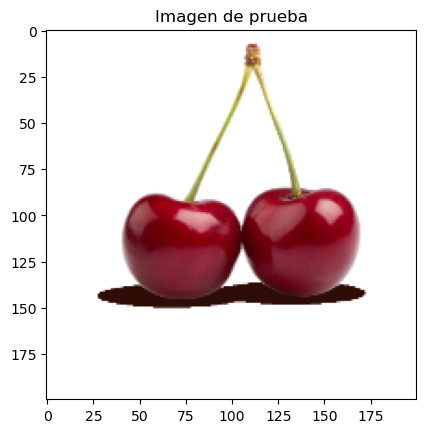

In [7]:
img_test_cereza = cv2.imread("frutas/pruebacereza2.png")
img_test_cereza = cv2.cvtColor(img_test_cereza, cv2.COLOR_BGR2RGB)
img_test_cereza=cv2.resize(img_test_cereza, (200,200))
plt.imshow(img_test_cereza, cmap = 'Accent')
plt.title("Imagen de prueba")

Text(0.5, 1.0, 'Imagen de prueba')

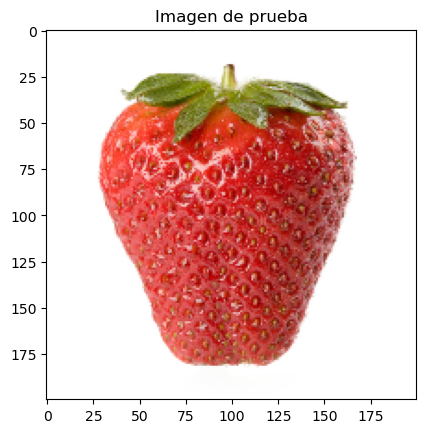

In [8]:
img_test_fresa = cv2.imread("frutas/pruebafresa.png")
img_test_fresa = cv2.cvtColor(img_test_fresa, cv2.COLOR_BGR2RGB)
img_test_fresa=cv2.resize(img_test_fresa, (200,200))
plt.imshow(img_test_fresa, cmap = 'Accent')
plt.title("Imagen de prueba")

Text(0.5, 1.0, 'Imagen de prueba')

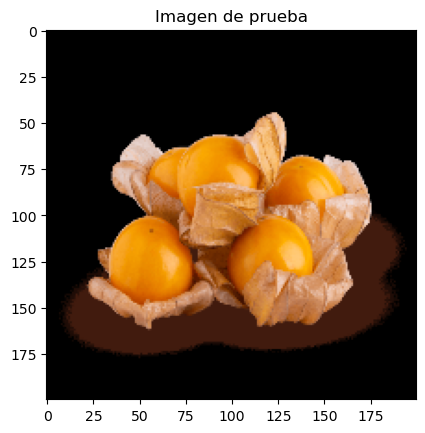

In [9]:
img_test_uchuva = cv2.imread("frutas/pruebauchuva2.png")
img_test_uchuva = cv2.cvtColor(img_test_uchuva, cv2.COLOR_BGR2RGB)
img_test_uchuva=cv2.resize(img_test_uchuva, (200,200))
plt.imshow(img_test_uchuva, cmap = 'Accent')
plt.title("Imagen de prueba")

## Crear el clasificador

### Remodelando la imagen

In [10]:
x = np.array(x)
y = np.array(y)

x.shape

(50, 200, 200, 3)

In [11]:
x=x.reshape(50, 200*200*3)
x

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [162,  53,  74, ..., 189,  78,  81],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [245, 245, 245, ..., 245, 245, 245],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### Obtener los conjuntos de prueba y de entrenamiento

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train

array([[255, 255, 255, ..., 231, 230, 236],
       [162,  53,  74, ..., 189,  78,  81],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [170,  16,  13, ..., 180, 180, 184],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### Crear el clasificador

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clasificador = KNeighborsClassifier(n_neighbors=1)
clasificador.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Ejecutar el clasificador

In [14]:
y_pred=clasificador.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [15]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

## Crear la matriz de confusión

In [16]:
from sklearn.metrics import confusion_matrix
matriz_knn=confusion_matrix(y_test,y_pred)
print('Matriz de Confusión: ')
print(matriz_knn)

Matriz de Confusión: 
[[3 2]
 [0 5]]


## Obtener la precisión del modelo

In [17]:
from sklearn.metrics import precision_score
prec=precision_score(y_test,y_pred, average=None)
print(f'Precisión del modelo por clase: {prec}')
print(f'Precisión prom del modelo {prec.mean()}')

Precisión del modelo por clase: [1.         0.71428571]
Precisión prom del modelo 0.8571428571428572


In [18]:
from sklearn.metrics import accuracy_score
exac=accuracy_score(y_test,y_pred)
print(f'exactitud del modelo: {exac}')

exactitud del modelo: 0.8


# Clasificador de frutas usando Regresión Logística

In [19]:
X = []
Y = []

for i in range(len(images)):
  img = cv2.imread(images[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_rs=cv2.resize(img, (200,200))
  X.append(img_rs)
  Y.append(labels[i])

In [20]:
X = np.array(X)
Y = np.array(Y)

X.shape

(50, 200, 200, 3)

In [21]:
X=X.reshape(50, 200*200*3)
X

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [162,  53,  74, ..., 189,  78,  81],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [245, 245, 245, ..., 245, 245, 245],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
X_train

array([[255, 255, 255, ..., 231, 230, 236],
       [162,  53,  74, ..., 189,  78,  81],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [170,  16,  13, ..., 180, 180, 184],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [25]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [26]:
from sklearn.metrics import confusion_matrix
matriz_knn=confusion_matrix(y_test,y_pred)
print('Matriz de Confusión: ')
print(matriz_knn)

Matriz de Confusión: 
[[4 1]
 [1 4]]


In [27]:
from sklearn.metrics import precision_score
prec=precision_score(y_test,y_pred, average=None)
print(f'Precisión del modelo por clase: {prec}')
print(f'Precisión prom del modelo {prec.mean()}')

Precisión del modelo por clase: [0.8 0.8]
Precisión prom del modelo 0.8


In [28]:
from sklearn.metrics import accuracy_score
exac=accuracy_score(y_test,y_pred)
print(f'exactitud del modelo: {exac}')

exactitud del modelo: 0.8


In [29]:
img_test_rd=img_test_cereza.reshape(1,200*200*3)
pred=clasificador.predict(img_test_rd)
print(pred[0])

0


In [30]:
img_test_rd=img_test_fresa.reshape(1,200*200*3)
pred=clasificador.predict(img_test_rd)
print(pred[0])

0


In [31]:
img_test_rd=img_test_uchuva.reshape(1,200*200*3)
pred=clasificador.predict(img_test_rd)
print(pred[0])

1


In [32]:
if(pred[0]==0):
  print("Es Fresa")
else:
  print("Es Uchuva")

Es Uchuva


# Detección de colores

## Imagen de prueba

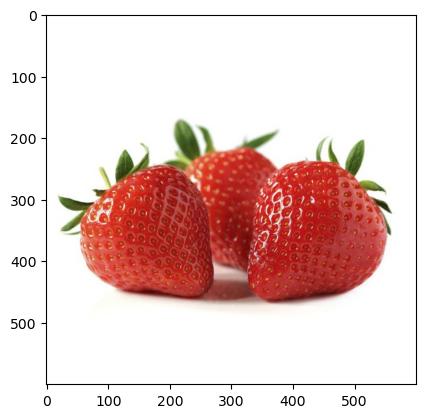

In [33]:
img = cv2.imread("frutas/Fresa1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap="Accent")
plt.show()

## Remodelando la imagen

In [34]:
img.shape

(600, 600, 3)

In [35]:
img_fl = img.reshape(600 * 600, 3)
img_fl

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [36]:
img_fl.shape

(360000, 3)

## Aplicando clustering

In [37]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(img_fl)

/home/sebastian/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fcffdc5c1f0>
Traceback (most recent call last):
  File "/home/sebastian/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sebastian/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sebastian/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sebastian/anaconda3/lib/python3.10/site-packages/t

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fcffdbe2e60>
Traceback (most recent call last):
  File "/home/sebastian/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sebastian/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sebastian/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sebastian/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


KMeans(n_clusters=3)

In [38]:
km.cluster_centers_

array([[199.07890693, 122.98799784,  99.70231322],
       [254.25814923, 253.90201484, 253.22679398],
       [168.50893347,  47.74351757,  37.25594571]])

## Obteniendo las etiquetas

In [39]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [40]:
labels = km.labels_
mat_lb = labels.reshape(600, 600)
mat_lb

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

## Algoritmo de coloración

In [41]:
import numpy as np

img_cp = np.copy(img)
height = img_cp.shape[0]
width = img_cp.shape[1]

colors = [
    km.cluster_centers_[i] for i in range(len(km.cluster_centers_))
]

colors

[array([199.07890693, 122.98799784,  99.70231322]),
 array([254.25814923, 253.90201484, 253.22679398]),
 array([168.50893347,  47.74351757,  37.25594571])]

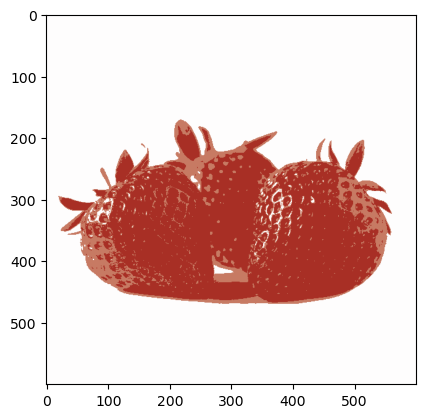

In [42]:
def assign_rgb(image, color):
    for c in range(len(color)):
        image[c] = color[c]

for h in range(height):
    for w in range(width):
        assign_rgb(img_cp[h][w], colors[mat_lb[h][w]])
        
plt.imshow(img_cp, cmap="Accent")
plt.show()